# Exercise 5

Authors: Cui Ding(olatname: cding)<br>
Matriculation Numbers: 21-718-945<br>

Mia Tatjana Egli (olatname: miaegl)<br>
Matriculation Numbers: 21-700-406<br>

## Task 1: Pandas and seaborn

In this exercise, you will familiarize yourself with the modules pandas and seaborn.

### What are pandas and seaborn?

Pandas is a Python library, which is used for working with data sets. It has many functions that make manipulating and analyzing data easier.

Seaborn is a python library based on matplotlib. It allows you to create good-looking graphs and visualizations easily, and it's well-suited to working with panda data frames.


### Dataset

The dataset we are analyzing is called '[University students by year, ISCED field, sex and level of study](https://www.bfs.admin.ch/bfs/en/home/statistics/catalogues-databases/data.assetdetail.21884445.html)' and comes from the Bundesamt für Statistik. We provided you with a file called `student_data.csv`, which contains the data for the last ten years.

### Solving this task

Work through this Jupyter notebook, making sure to run each code panel before moving on to the next. Read the descriptions carefully and fill in where there's a #TODO.

In [2]:
# !pip3 install pandas
# !pip3 install seaborn

In [3]:
""" Run this import statement once, so that you have all the packages available to you. """

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Read in the data

Read in the data, creating a [pandas data frame](https://www.w3schools.com/python/pandas/pandas_dataframes.asp). Don't forget to open the file you want to work with. You can use the function [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to do so. If you run into trouble with pandas not separating the columns/rows correctly, look at your file in a different program and then specify the separator that is being used.

You can use data_frame.head() to print the first few lines and see what the data structure looks like.

In [4]:
data = pd.read_csv('student_data.csv', encoding='utf-8', sep=';')
data.head(10)

,Year,ISCED Field,Sex,Bachelor,Master,Doctorate
0,2012/13,Education science,Male,115,89,103
1,2012/13,Education science,Female,584,380,220
2,2012/13,Teacher training without subject specialisation,Male,144,61,12
3,2012/13,Teacher training without subject specialisation,Female,688,483,31
4,2012/13,Teacher training with subject specialisation,Male,771,356,23
5,2012/13,Teacher training with subject specialisation,Female,475,284,25
6,2012/13,Fine arts,Male,59,42,95
7,2012/13,Fine arts,Female,310,262,221
8,2012/13,Music and performing arts,Male,44,31,68
9,2012/13,Music and performing arts,Female,83,63,68


In [5]:
data.info()  # to explore the data before using it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         820 non-null    object
 1   ISCED Field  820 non-null    object
 2   Sex          820 non-null    object
 3   Bachelor     820 non-null    int64 
 4   Master       820 non-null    int64 
 5   Doctorate    820 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 38.6+ KB


In [6]:
data.describe()  # to explore the data.

,Bachelor,Master,Doctorate
count,820.000000,820.000000,820.000000
mean,898.639024,501.924390,303.589024
std,1200.632119,663.011295,378.750511
min,0.000000,0.000000,0.000000
25%,158.000000,98.000000,69.000000
50%,469.500000,298.500000,188.500000
75%,1147.000000,581.500000,398.250000
max,6821.000000,4249.000000,3026.000000


In [7]:
data.isnull().sum()  # to see whether there is missing data.

Year           0
ISCED Field    0
Sex            0
Bachelor       0
Master         0
Doctorate      0
dtype: int64

### 1.2 Students by level of study

Now we will have a look at the data. 

1. How many Bachelor's, Master's and Doctorate students were there each year (across all subjects)? You can use the pandas function '[groupby](https://www.geeksforgeeks.org/pandas-groupby/)' to do this.
2. Visualize this data using a [seaborn lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html), so that you can see how the student numbers changed over the years.

In [8]:
df_year = data.groupby(['Year']).sum()

In [9]:
df_year

,Bachelor,Master,Doctorate
Year,,,
2012/13,69774,34221,22643
2013/14,70562,36571,23177
2014/15,70682,38260,23652
2015/16,71546,39154,24364
2016/17,72593,40116,24796
2017/18,73493,41301,25165
2018/19,74190,42410,25423
2019/20,75303,43989,25911
2020/21,79296,46642,26601


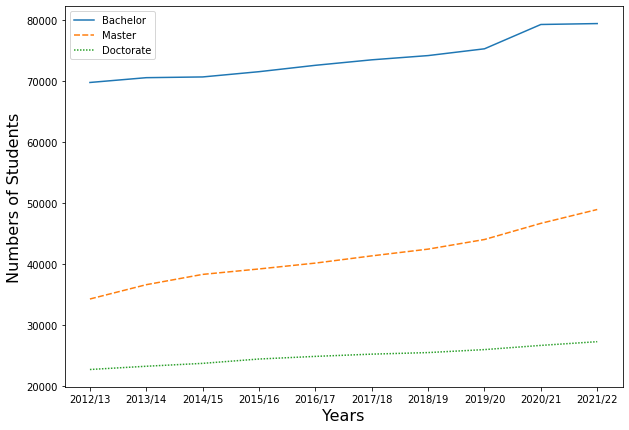

In [10]:
plt.figure(figsize=(10, 7))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Numbers of Students', fontsize=16)
sns.lineplot(data=df_year)
plt.show()

In [11]:
# Alternative way --> for fun.

df_y = df_year.reset_index()
df_y = df_y.melt(id_vars=['Year'],
             value_vars=['Bachelor', 'Master', 'Doctorate'],
             var_name="Degree",
             value_name="Numbers")
df_y.head(15)
# df_y.sort_values(by=['Year'], ignore_index=True)

,Year,Degree,Numbers
0,2012/13,Bachelor,69774
1,2013/14,Bachelor,70562
2,2014/15,Bachelor,70682
3,2015/16,Bachelor,71546
4,2016/17,Bachelor,72593
5,2017/18,Bachelor,73493
6,2018/19,Bachelor,74190
7,2019/20,Bachelor,75303
8,2020/21,Bachelor,79296
9,2021/22,Bachelor,79445


<AxesSubplot:xlabel='Years', ylabel='Numbers of Students'>

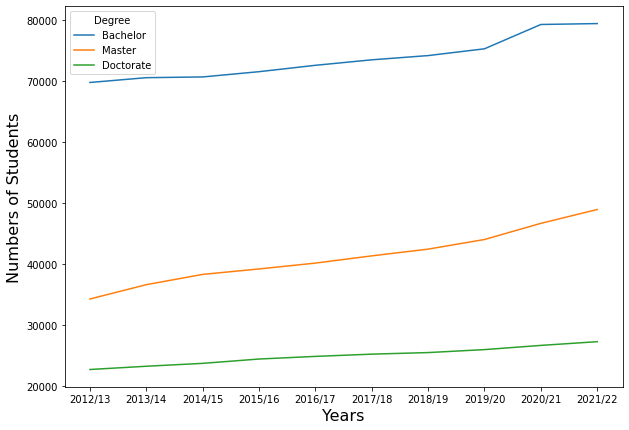

In [12]:
# Alternative way --> for fun.

plt.figure(figsize=(10, 7))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Numbers of Students', fontsize=16)
sns.lineplot(data=df_y, x='Year', y='Numbers', hue='Degree')

### 1.3 Students of Year 2021/22

Now we only want to look at the students from the year 2021/22.
1. Make a new table only containing the students of year 2021/22.
2. Add a column called 'sum', containing the sum of all Bachelor, Master and Doctorate students for each subject respectively.
3. Make a [bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html) using seaborn, so that you can compare the different subjects in terms of student numbers. Which subject had the most students? Which one the fewest?

Answer:

`Management and administration` has the most students.<br>
`Forestry` has the fewest students.

In [13]:
df_2022 = data.loc[data['Year']=='2021/22']
df_2022

,Year,ISCED Field,Sex,Bachelor,Master,Doctorate
738,2021/22,Education science,Male,141,143,115
739,2021/22,Education science,Female,701,599,318
740,2021/22,Teacher training without subject specialisation,Male,158,113,3
741,2021/22,Teacher training without subject specialisation,Female,737,556,44
742,2021/22,Teacher training with subject specialisation,Male,633,424,46
...,...,...,...,...,...,...
815,2021/22,Pharmacy,Female,954,428,134
816,2021/22,Social work and counselling,Male,29,16,4
817,2021/22,Social work and counselling,Female,125,43,5
818,2021/22,Military and defence,Male,43,0,0


In [48]:
df_sum = df_2022.copy()
column_name = ['Bachelor', 'Master', 'Doctorate']
df_sum.loc[:,'sum'] = df_2022[column_name].sum(axis=1)   
# df_sum['sum'] = df_2022[column_name].sum(axis=1)
df_sum.head()

,Year,ISCED Field,Sex,Bachelor,Master,Doctorate,sum
738,2021/22,Education science,Male,141,143,115,399
739,2021/22,Education science,Female,701,599,318,1618
740,2021/22,Teacher training without subject specialisation,Male,158,113,3,274
741,2021/22,Teacher training without subject specialisation,Female,737,556,44,1337
742,2021/22,Teacher training with subject specialisation,Male,633,424,46,1103


In [15]:
# We tried to keep the original columns here as well.

df_sum = df_sum.groupby(['ISCED Field'], sort=False, as_index= False).agg({'Year':'first',
                                                                   'Bachelor':'sum',
                                                                  'Master':'sum',
                                                                  'Doctorate':'sum',
                                                                  'sum':'sum'})

In [42]:
df_sum.head()

,ISCED Field,Year,Bachelor,Master,Doctorate,sum
0,Education science,2021/22,842,742,433,2017
1,Teacher training without subject specialisation,2021/22,895,669,47,1611
2,Teacher training with subject specialisation,2021/22,996,640,77,1713
3,Fine arts,2021/22,281,377,295,953
4,Music and performing arts,2021/22,200,95,171,466


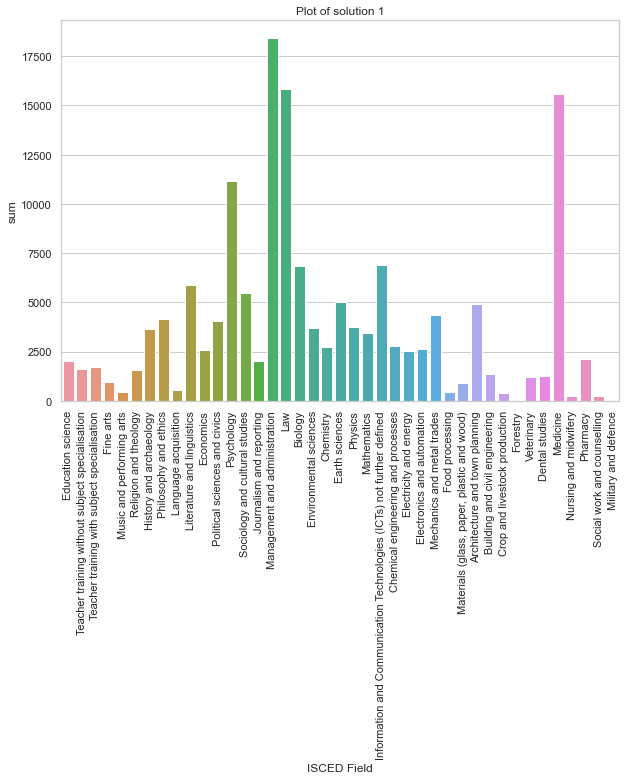

In [17]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='ISCED Field', y='sum', data=df_sum)
ax.set_title('Plot of solution 1')
ax.tick_params(axis='x', rotation=90) 

In [18]:
df_sum2 = df_2022.copy()

In [19]:
# We are trying to save as much original information as possible, i.e. columns for 'Sex', 'Year'. 

df_sum_clmn = df_2022.groupby(['ISCED Field'], sort=False).sum().sum(axis=1).to_frame('sum')
df_sum2 = df_sum2.merge(df_sum_clmn, how='inner', on='ISCED Field')
df_sum2.groupby(['ISCED Field','sum','Sex'], sort=False).first()

Year  \
ISCED Field                                     sum  Sex               
Education science                               2017 Male    2021/22   
                                                     Female  2021/22   
Teacher training without subject specialisation 1611 Male    2021/22   
                                                     Female  2021/22   
Teacher training with subject specialisation    1713 Male    2021/22   
...                                                              ...   
Pharmacy                                        2128 Female  2021/22   
Social work and counselling                     222  Male    2021/22   
                                                     Female  2021/22   
Military and defence                            48   Male    2021/22   
                                                     Female  2021/22   

                                                             Bachelor  Master  \
ISCED Field                                     sum  Sex                        
Education science                               2017 Male         141     143   
                                                     Female       701     599   
Teacher training without subject specialisation 1611 Male         158     113   
                                                     Female       737     556   
Teacher training with subject specialisation    1713 Male         633     424   
...                                                               ...     ...   
Pharmacy                                        2128 Female       954     428   
Social work and counselling                     222  Male          29      16   
                                                     Female       125      43   
Military and defence                            48   Male          43       0   
                                                     Female         5       0   

                                                             Doctorate  
ISCED Field                                     sum  Sex                
Education science                               2017 Male          115  
                                                     Female        318  
Teacher training without subject specialisation 1611 Male            3  
                                                     Female         44  
Teacher training with subject specialisation    1713 Male           46  
...                                                                ...  
Pharmacy                                        2128 Female        134  
Social work and counselling                     222  Male            4  
                                                     Female          5  
Military and defence                            48   Male            0  
                                                     Female          0  

[82 rows x 4 columns]

Text(0.5, 1.0, 'Plot of solution 2')

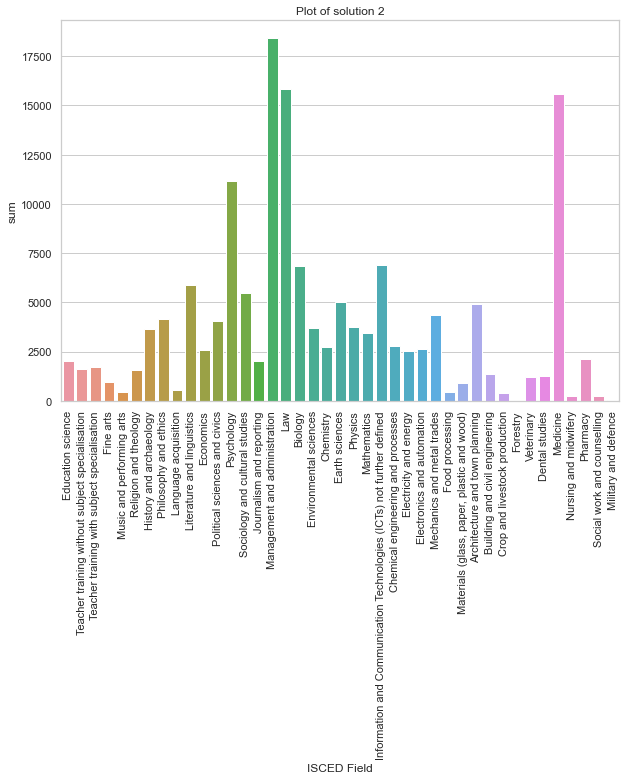

In [20]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='ISCED Field', y='sum', data=df_sum2)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Plot of solution 2')


### 1.4 Gender distribution

1. The data set also includes data on the legal gender/sex of the students. Select five different subjects, and plot them in a way so you can compare the development over the years. You can be creative with it: You can compare the absolute numbers, compare the gender ratio and/or compare the different subjects to each other.
2. What is something interesting you've discovered by visualizing the data this way? Did it help you to better understand the data?

(1) There are significantly more people, especially woman who choose to study 'Literature and linguistics'.<br>
(2) Man and woman tend to like different subjects, since there is a discrepancy in each subject in the number of male and female students.<br>
(3) The radio of man and woman choosing one subject stays stable across the years, while in general the total numbers of students is increasing for almost every subjects.

Yes, it helps us to understand the data better.


3. A very cool feature of seaborn are the ways in which you can customize the [look of your plots](http://seaborn.pydata.org/tutorial/aesthetics.html). Try out some different colors and styles on your plots. :)




In [99]:
subjects = ['Philosophy and ethics', 'Literature and linguistics', 'Economics', 'Physics', 'Mathematics']

In [100]:
df_sub = data.loc[data['ISCED Field'].isin(subjects)]
df = df_sub.copy()
df.loc[:,'Total'] = df_sub.iloc[:, -3:].sum(axis=1)

In [101]:
ratio = round(df['Total']/df.groupby(['Year','ISCED Field'], sort=False)['Total'].transform('sum'),2).to_frame('ratio')

In [102]:
df['Ratio(/Total)'] = ratio
df

,Year,ISCED Field,Sex,Bachelor,Master,Doctorate,Total,Ratio(/Total)
14,2012/13,Philosophy and ethics,Male,1302,269,214,1785,0.42
15,2012/13,Philosophy and ethics,Female,1982,375,117,2474,0.58
18,2012/13,Literature and linguistics,Male,893,404,385,1682,0.28
19,2012/13,Literature and linguistics,Female,2543,1183,707,4433,0.72
20,2012/13,Economics,Male,905,491,173,1569,0.69
...,...,...,...,...,...,...,...,...
759,2021/22,Economics,Female,354,357,120,831,0.32
780,2021/22,Physics,Male,1360,658,845,2863,0.76
781,2021/22,Physics,Female,423,209,266,898,0.24
782,2021/22,Mathematics,Male,1306,877,286,2469,0.72


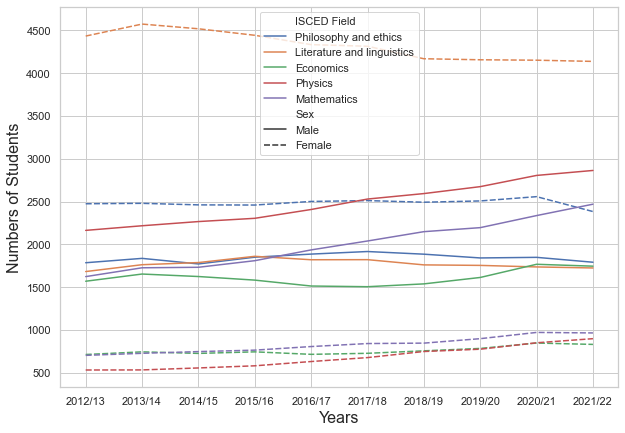

In [128]:
plt.figure(figsize=(10, 7))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Numbers of Students', fontsize=16)
ax1 = sns.lineplot(data=df, x='Year', y='Total', style='Sex', hue='ISCED Field')
ax1.legend(loc = 'upper center')
plt.show()

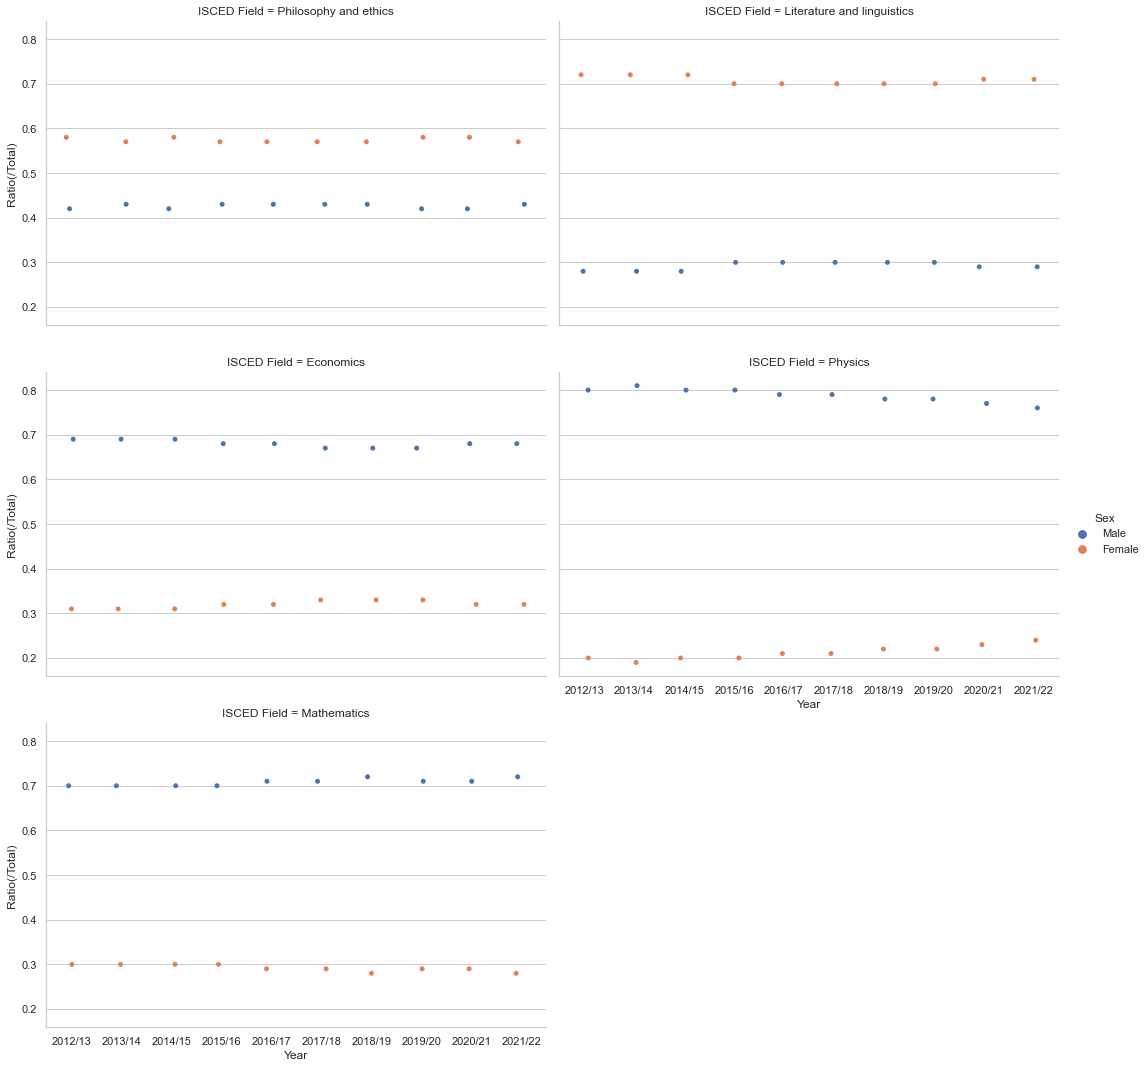

In [129]:
ax2 = sns.catplot(x="Year", y="Ratio(/Total)", col="ISCED Field", col_wrap=2, hue='Sex', aspect=1.5, data=df) # aspect makes the width 1.5 times than the hight
plt.show()


## Task 2: Writing a README

A good README or documentation is key to your program or package being used properly or being used at all. But as you know, some documentations are a pain to work through. There are some conventional guidelines you can follow, to ensure that your documentation is as precise and short as possible.

In this task, you will practise writing a README within a given maximum number of sentences. Keep it simple and short. Have a look at the code in the cell below. Try to run it and understand how it works. Once you grasped the idea and workings of the code, write a README following the given structure.

In [130]:
#!/usr/bin/env python3

# Author: Giovanna Gelata



class Gelateria:

    food_type = 'ice cream'

    def __init__(self, name: str, location: str):
        self.name = name
        self.location = location
        self._flavours = list()
        self._price = 1.00
        self._order_number = 1


    def add_flavours(self, flavours):
        if type(flavours) == str:
            if flavours in self._flavours:
                print(f'Flavour "{flavours}" is already in the system.')
            else:
                self._flavours.append(flavours)
        elif type(flavours) == list:
            for flavour in flavours:
                if flavour in self._flavours:
                    print(f'Flavour "{flavour}" is already in the system.')
                else:
                    self._flavours.append(flavour)


    def _calculate_price(self, number_of_scoops: int):
        return number_of_scoops * self._price


    def take_order(self):
        order = dict()
        count_ice = 0
        price = 0
        print()
        print('-'*15)
        print(f'Order {self._order_number}')
        print('-'*15)
        print('Your order:')
        add_more = None

        while add_more != 'q':
            count_ice += 1
            flavours = input('Flavours separated by commas: * ').split(",")
            # print(flavours)
            for flav in flavours:
                flav_clean = flav.strip()
                if flav_clean not in self._flavours:
                    print(f'Sadly, flavour \'{flav}\' is not available.')
                    del flavours[flavours.index(flav)]
                    continue
            amounts = input('Amounts separated by commas: * ').split(",")
            order[count_ice] = {i: j for i, j in zip(flavours, amounts)}
            add_more = input('To add more, press enter. If you\'re finished, press \'q\'. ')

        for order_no, it in order.items():
            for k, v in it.items():
                price += self._calculate_price(float(v))

        print(f'Price: {price}0 €')
        print('Thank you for your order!')

        self._order_number += 1


    def __repr__(self):
        string = '\n'
        string += f'Welcome to the gelateria {self.name} from {self.location}!\n'
        string += f'We are happy to serve you. Our hand-made ice cream is made from an original family recipe.\n'
        string += 'We offer the following flavours of ice cream for you to enjoy: \n'
        if self._flavours:
            for flav in self._flavours:
                string += f'\t* {flav.capitalize()}\n'
        else:
            string += '\tUnfortunately, we have no flavours available.\n'
        string += 'We are happy to serve you!\n'
        return string


Please write your answers in the text cell below.

### THEMODULENAME

Author: Your name and e-mail here.

Authors: Cui Ding<br>
Email: cui.ding@uzh.ch<br>

Authors: Mia Tatjana Egli<br>
Email: miatatjana.egli@uzh.ch<br>

\# TODO: Describe briefly the basic functionality of the program in maximum three sentences.

This program allows **ice-cream sellers** to display a welcoming screen to customs which also shows the flavors available by setting the stall name and the address and typing the flavors in `add_flavors` function.

It will allow **customs** to order ice-creams by entering the flavors and the amount of scoops they want, warning been dispalyed if a flavor is not available, and customs can order more than one ice-creams just by press `'enter'` to order more, `'q'` to quit.

It will calculate the sum of **money** a custom need to pay for their order as well as dispalying the 'thank you' message.

##### **Installation**

\# TODO: How can one install the package? Which modules are required for the package? Describe the installation in maximum four sentences and add a list of the requirements.

Installation: 

```sh
$ git clone https://gitlab.uzh.ch/pcl2-2022-assignments/Exercise_5
$ cd Exercise_5
$ git checkout solution
$ pip install .
```
No other modules are required for the package.

Requirements:

No requirements.


##### **Functionalities**

\# TODO: What can the program do? Write a complete list of all the functionalities with a short description and include at least one example for each function.

- Firstly, it can display a `'welcome' text` in a screen all the time and add a `'thank you' text` to the screen after each ordering. This is achieved by the **__repre__()** function. 

- Secondly, it will also the seller to add flavors to the system and dispaly them together with the 'welcome' text. This is achieved by the **add_flavours()** function.

- Thirdly, it will take orders from the customs by allow them to input the flavors, the number of scoops they want. If the wanted flavors are not availiable, an `'apology' text` will appear. It is achieved by the **take_order()** function.

- Fourthly, in one order, customs can buy as many ice-cream as they want by pressing `'enter'` to add more and `'q'` to finish the order. This is achieved by the **take_order()** function as well.

- Most importantly, it can calculate the amount of money of an order for the sellers. People don't like maths, so it is a very import function, achieved by the **_calculate_price()** function.



##### **Improvements**

\# TODO: For other developers, it is nice to know what functions you intend to extend your module with. Write at least two points that could be improved in further development.

- Add a commond line interface which can allow the sellers to set the flavors availiable if there is any change, and it has some default flavors.

- Add `add_size(self, size)` function which allows the custom to choose which size of the ice-cream they want, i.e. small, middle, large.

- Improve the `take_order(self)` function: if the flavor a custom choose is not availiable, print "Sadly, flavour *** is not available", **then ask him/her to change to another flavor by inputing a flavor**. If they don't want other flavors, press `'enter'` to continue.



# Feedback

Please give us a short feedback on this exercise. You can type in your answers and thoughts into the text boxes below.


a) How much time did you spend roughly on this exercise?

[your answer] About 4 hours

b) How difficult was this exercise? Was the difficulty too high, too low or just right?

[your answer] Not difficult.

c) Do you feel more comfortable now with the topics from the exercise and lectures?

[your answer] Yes!

## Exam Prep – Task 3: Object Oriented Programming

Note: This is an **optional exercise**, which is similar to something you might encounter in the exam. We will not correct it, but we will give you a sample solution. Feel free to either solve it here or in a seperate .py file.



### Destination Class
You want to go sightseeing in Zurich, but there's so much to do! To help you store all the different landmarks, you decide to write a program and create a Python class.

In the folder `zurich_sightseeing` you will find five .txt files containing basic information about one destination each. Have a look at the files. You should be able to read them in easily, since they are all structured in the same way.

To instanciate a single destination, you call the class as follows:

```
>>> grossmunster = Destination("zurich_sightseeing\grossmunster")
```

You want to easily be able to look at all the information about the destination, so **printing the object** should just return all the information in the .txt file.

```
>>> print(grossmunster)

Grossmünster
The Grossmünster church is a landmark of Zurich. Legend has it that the church was built on the graves of the city’s patron saints, Felix and Regula.

Distance to Zurich Main Station: 892 m
Open on: Mon Tue Wed Thu Fri Sat Sun
```

When you're planing where to go, you want to be able to compare two destinations on **how far away they are from Zurich Main Station**. You have to be careful, since some distances are in m, others in km.

If you want to know if the Grossmünster is further away from the Main Station than the Kunsthaus, you can check like this:



```
>>> grossmunster > kunsthaus

False
```

When deciding on a day for your trip, it's important to know if the destinations in question are open on the same day! You want to be able to check **if a destination is open on a specific day**, as well as check **what opening days two destinations share with each other**.


```
>>> grossmunster.open_on("Tue")

True

>>> grossmunster.shared_opening_days(photobastei)

Thu Fri Sat Sun

```







## Exam Prep – Task 4: Encodings



Note: This is an **optional exercise**, which is similar to something you might encounter in the exam. We will not correct it, but we will give you a sample solution. Feel free to either solve it here or in a seperate .py file.

### Calculating Prices For Words

You got a call from a company who would like to hire you. The company sells many personalizable items such as mugs, clothing or pencils. They offer a wide range of customizability, but recently they got many complaints about names or words that contain non-ASCII characters or are simply too long to fit (sadly, the company is not too progressive with non-European names, yet). The company is now planning to widen the options for the customers, but of course, it doesn't come for free. Depending on the personalizzation, prices vary. Your job is to write a program that calculates the prices for the items according to length of word(s) and number of non-ASCII characters.

First of all, create a class, which takes any string as input. The string can include non-ASCII characters and emojis. To calculate the final price, you need to calculate the 'length-weight' first. Alter the \_\_len__ method in a way, that it returns your own calculated length, instead of the Python defaulted one. The method should be callable like this:

```
# how it should be
>>> name = Personalize('Ali Smith')
>>> len(name)
8
```

Since printing non-standard characters is more work (according to the printing company), the price of a string varies depending on its characters. Your boss gave you some rules that your program should follow:

* Whitespaces don't count
* ASCII characters count 1 each
* ASCII characters with accents count 1 each
* Emojis count 2 each
* Characters outside the Latin writing system count 3 each

A call of the len-function could look like the following: 
```
# how it should be
>>> name = Personalize('Ali Smith 🌈')
>>> len(name)
10
```
#### Emojis

To calculate the weight of emojis, some further processing is needed. As emojis get more features, single glyphs are not enough anymore. Some emojis require many pieces. The different 'sub-emojis' are connected by the so-called *zero-width* character '\u200d'. If this character is present, you can assume that the whole emoji-string belongs together.

```
# example of Python's default
>>> text = '👰🏾‍♂️'
>>> [char for char in text]
['👰', '🏾', '\u200d', '♂', '️']
>>> t2 = '🏐💗'
>>> [char for char in t2]
['🏐', '💗']  # as you can see, no zero-with character is used
```

Especially for person emojis, sex and skintone can be modified. By default, Python counts the modifying codepoints and adds them up. For example, one single emoji can have a length of five.

```
# how it should NOT be
>>> text = '👰🏾‍♂️'
>>> len(text)  # see the cope snipped above for reference
5
```

Such customizations should not cost extra, since the 'length' of the emoji is not affected – no matter which sex or skintone it has, the emoji is always one glyph. For sex, emojis can have the attribute ♀, ♂ or nothing. The five available skintones are:
* 🏻
* 🏼
* 🏽
* 🏾
* 🏿

None of them should increase the price. Thus, your code should output the following:

```
# how it should be
>>> emoji = Personalize('👰🏾‍♂️')
>>> len(emoji)
2

```

For the exercise, you might want to use the [emoji](https://pypi.org/project/emoji/) module. Especially the attribute EMOJI_DATA could come in very handy. Have a look at its value(s).

#### Non-Latin Writing Systems

For any character which cannot be encoded in Latin-1, the count should increase by 3. See the examples below.


#### Calculating
Lastly, write a function that returns a price to the user according to input. The item should be defined at instantiation of the class.

```
>>> name = Personalized('Ali Smith', 'mug')
```

Don't forget to add the prices for the items that should be personalized. To do so, use the dictionary in the code cell below. The new calculated length is the price in any currency you like. Make a nice interface that returns a type of receipt for the user. All characters, their prices and the final price should be enlisted.

### Examples
The following examples might help to understand the workings of the functions further.

```
>>> name_jp = Personalize('莉子', 'notebook')
>>> len(name_jp)
6
>>> calculate_price(name_jp)
16 CHF

```


```
>>> name_fr = Personalize('Allez les bleus! Olé', 'cap')
>>> calculate_price(name_fr)
32 CHF

```

```
>>> name_emojis = Personalize('Anaïs 👱🏼‍♀️🍋', 'flag')
>>> calculate_price(name_emojis)
39
```

In [ ]:
pricing = {
    'mug': 10,
    't-shirt': 20,
    'notebook': 5,
    'waterbottle': 45,
    'drinking glass': 10,
    'pencil': 3,
    'backpack': 80,
    'cap': 15,
    'flag': 30,
    'ferrari': 400000
}